### OpenCV를 이용한 얼굴 인식

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# 경로 변경
%cd /content/gdrive/MyDrive/pytest_img/opencv/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/pytest_img/opencv


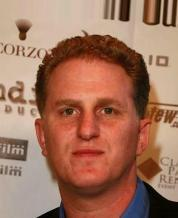

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/gdrive/MyDrive/pytest_img/img_align_celeba_small/202485.jpg')

# 이미지 그리기
cv2_imshow(img)

# 사용자의 반응을 기다리는 함수
# 파이썬 커널과의 충돌을 막기 위해 필요
cv2.waitKey(0)

# 모든 윈도우를 닫기
cv2.destroyAllWindows()


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# 얼굴을 쉽게 찾도록 이미지를 회색조로 변환
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')# 얼굴을 찾는 알고리즘 파일 로드
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')# 눈을 찾는 알고리즘 파일 로드
# scaleFactor : 얼굴 인식 감도(사각형 크기) 이미지를 20%씩 줄이며 검색 너무 빨리 줄면 놓치므로 1.1~1.4를 사용
# minNeighbors : 인식해야 하는 최소 얼굴의 수
faces = face_cascade.detectMultiScale(image=gray, scaleFactor=1.2, minNeighbors=1)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)# 얼굴 포지션 얼굴 사각형의 색상과 크기
    roi_gray = gray[y:y+h, x:x+w]# 회색조와 컬러로 얼굴 영역을 (height, width)로 입력
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)# 회색조 결과를 이용하여 얼굴 영역에서 눈 인식
    for (ex, ey, ew, eh) in eyes:# 눈 인식 결과 x, y, w, h 의 네 개 position이 나온다
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)# 눈 포지션. x에 width를, y에 height를 더함 (start point, end point)

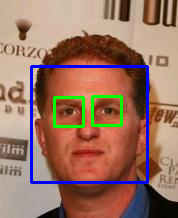

In [ ]:
cv2_imshow(img)

# 사용자의 반응을 기다리는 함수
# 파이썬 커널과의 충돌을 막기 위해 필요
cv2.waitKey(0)

# 모든 윈도우를 닫기
cv2.destroyAllWindows()

### Dlib

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


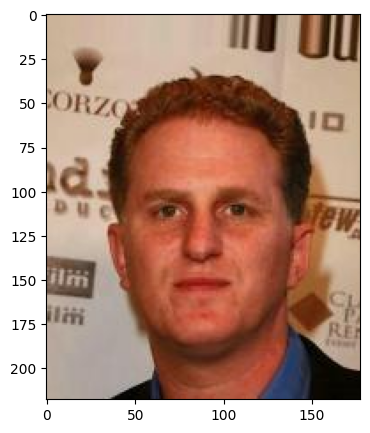

In [ ]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
img_path = '/content/gdrive/MyDrive/pytest_img/img_align_celeba_small/202485.jpg'
sp = dlib.shape_predictor("/content/gdrive/MyDrive/pytest_img/dlib/shape_predictor_5_face_landmarks.dat")
detector = dlib.get_frontal_face_detector() # 얼굴 인식 함수
img = dlib.load_rgb_image(img_path) # 이미지 로드
plt.figure(figsize=(8, 5)) # 이미지 사이즈 설정
plt.imshow(img)

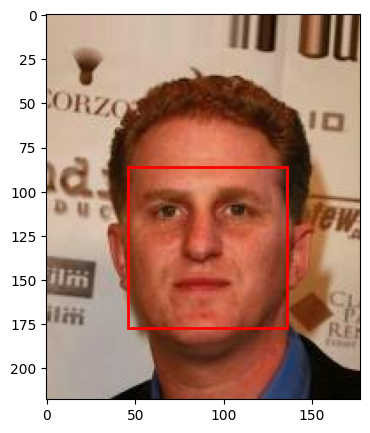

In [ ]:
img_result = img.copy()
dets = detector(img, 1) # 1은 업샘플링 횟수. 횟수를 늘릴수록 해상도가 높아진다

if len(dets) == 0: # 얼굴영역의 갯수가 0일 경우
  print('cannot find faces!')

fig, ax = plt.subplots(1, figsize=(8, 5)) # 이미지 사이즈 설정. figure는 전체 캔버스, axes는 부분 영역(여기서는 1개)

for det in dets: # 인식된 얼굴 영역 개수에 따라 x, y, w, h 위치 파악
  x, y, w, h = det.left(), det.top(), det.width(), det.height()
  rect = patches.Rectangle((x,y), w, h, linewidth=2, edgecolor='r', facecolor='none') # 사각형 옵션
  ax.add_patch(rect) # 이미지에 사각형 부착

ax.imshow(img_result)

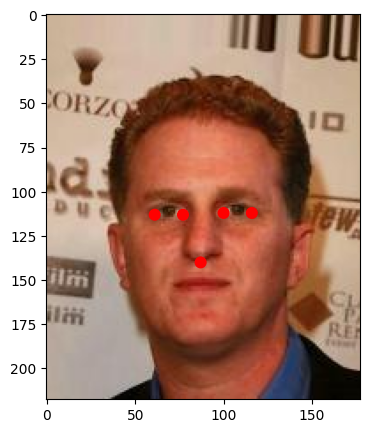

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 5))

for det in dets: # 검출된 얼굴 영역들
  s = sp(img, det) # 얼굴 주요 지점 인식 모델로 각 얼굴영역에서 얼굴 랜드마크를 찾는다
  for point in s.parts(): # 5개의 점에 대한 for문
    circle = patches.Circle((point.x, point.y), radius=3, edgecolor='r', facecolor='r')
    ax.add_patch(circle)

ax.imshow(img_result)

### Face Landmark

In [ ]:
RIGHT_EYE = list(range(36, 42)) # 오른쪽 눈. 36~41까지 생성
LEFT_EYE = list(range(42, 48)) # 왼쪽 눈. 42~47까지 생성
EYES = list(range(36, 48)) # 양쪽 눈. 36~47까지 생성
MOUTH = list(range(48, 68)) # 입. 48~67까지 생성
NOSE = list(range(27, 36)) # 코. 27~35까지 생성
EYEBROWS = list(range(17, 27)) # 양쪽 눈썹. 17~26까지 생성
JAWLINE = list(range(0, 17)) # 턱선. 0~16까지 생성
ALL = list(range(0, 68)) # 얼굴. 0~67까지 생성

In [ ]:
# 이번에는 dlib으로 이미지를 읽어서 OpenCV로 이미지를 출력해 본다
# dlib은 이미지를 RGB로 읽는데, OpenCV는 BGR로 처리하므로 변환해주어야 한다
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img_path = '/content/gdrive/MyDrive/pytest_img/img_align_celeba_small/202485.jpg'
sp = dlib.shape_predictor("/content/gdrive/MyDrive/pytest_img/dlib/shape_predictor_68_face_landmarks.dat")

detector = dlib.get_frontal_face_detector() # 얼굴 영역 인식 함수 # 얼굴의 68개 지점 인식 모델 로드

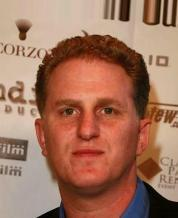

In [ ]:
# dlib으로 이미지 읽기
img = dlib.load_rgb_image(img_path) # 이미지를 RGB로 읽음
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # CV2에서 처리하기 위해 다시 BGR로 변환
cv2_imshow(img) # CV2로 이미지 출력
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 원본 이미지가 작기 때문에 사이즈를 키우고,
# 이미지의 얼굴이 몇 개인지 파악한다
img_result = img.copy() # 사본 생성
img_resize = cv2.resize(img_result, dsize=(350, 450)) # 크기 조절

gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY) # 더 잘 찾도록 흑백 이미지로 변환
dets = detector(gray, 1) # 이미지에서 얼굴 영역을 찾는다

if len(dets) == 0: # 얼굴영역의 갯수가 0일 경우
  print('발견된 얼굴이 없습니다!')

print("발견된 얼굴의 수:", len(dets)) # 1

발견된 얼굴의 수: 1


In [ ]:
sp(gray, det).parts()

points[(82, 239), (85, 265), (88, 289), (91, 314), (98, 338), (110, 358), (127, 374), (147, 385), (171, 387), (195, 384), (218, 375), (239, 360), (254, 342), (265, 320), (270, 294), (274, 269), (278, 243), (99, 224), (109, 211), (125, 205), (143, 205), (160, 210), (186, 207), (204, 202), (223, 202), (240, 208), (251, 221), (172, 226), (171, 241), (170, 256), (170, 271), (155, 285), (162, 288), (170, 290), (180, 288), (188, 284), (120, 234), (129, 226), (142, 226), (152, 234), (142, 237), (129, 238), (195, 233), (206, 224), (218, 225), (228, 232), (218, 236), (206, 235), (142, 319), (151, 311), (162, 307), (171, 309), (180, 307), (192, 310), (204, 316), (192, 323), (180, 326), (171, 327), (162, 326), (152, 325), (147, 319), (162, 315), (171, 316), (180, 315), (197, 317), (180, 316), (171, 317), (162, 317)]

In [ ]:
#이미지에서 얼굴의 주요 부위를 찾아 좌표를 출력한다
import numpy as np

for det in dets: # 얼굴 감지 결과(dets)에서 각 검출(det) 결과를 순회
  # shape predictor에 의해 감지된 랜드마크 포인트를 x, y 좌표로 계산하여 points 변수에 저장
  # 얼굴 주요 지점 인식 모델(sp)를 사용하여 각 얼굴영역에서 얼굴 랜드마크를 찾고, 이 포인트들의 x, y 좌표를 NumPy 행렬로 생성
  points = np.matrix([[p.x, p.y] for p in sp(gray, det).parts()])
  show_parts = points[ALL] # 0~67의 얼굴 포인트를 show_parts에 저장
  for (i, point) in enumerate(show_parts):
    x = point[0, 0] # x 좌표 (각 행의 첫 번째)
    y = point[0, 1] # y 좌표 (각 행의 두 번째)
    cv2.circle(img_resize, (x, y), 1, (0, 0, 255), -1) # 빨간색으로 점을 찍는다
    cv2.putText(img_resize, f"{i+1}", (x, y-2), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)# 점에 녹색으로 숫자 표시

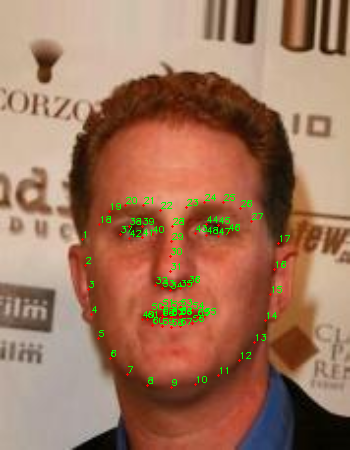

In [ ]:
cv2_imshow(img_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def eye_aspect_ratio(eye_points):
  A = np.linalg.norm(eye_points[1] - eye_points[5])
  B = np.linalg.norm(eye_points[2] - eye_points[4])
  C = np.linalg.norm(eye_points[0] - eye_points[3])
  EAR = (A + B) / (2.0 * C)
  return EAR

In [ ]:
for det in dets:
  points = np.array([[p.x, p.y] for p in sp(gray, det).parts()])
  left_eye_EAR = eye_aspect_ratio(points[LEFT_EYE]) # 왼쪽 눈 EAR
  right_eye_EAR = eye_aspect_ratio(points[RIGHT_EYE]) # 오른쪽 눈 EAR
  if left_eye_EAR < 0.25:
    print("왼쪽 눈을 감고 있음")
  else:
    print("왼쪽 눈을 뜨고 있음")
  if right_eye_EAR < 0.25:
    print("오른쪽 눈을 감고 있음")
  else:
    print("오른쪽 눈을 뜨고 있음")
print(left_eye_EAR)

왼쪽 눈을 뜨고 있음
오른쪽 눈을 뜨고 있음
0.3331803930484605


In [ ]:
def mouth_aspect_ratio(mouth_points):
  top = mouth_points[3] # 랜드마크 52 표시
  bottom = mouth_points[9] # 랜드마크 58 표시
  left = mouth_points[0] # 랜드마크 49 표시
  right = mouth_points[6] # 랜드마크 55 표시
  MAR = np.linalg.norm(top - bottom) / np.linalg.norm(left - right)

  return MAR

In [ ]:
for det in dets:
  points = np.array([[p.x, p.y] for p in sp(gray, det).parts()])
  mar = mouth_aspect_ratio(points[MOUTH]) # 입의 MAR 계산
  if mar > 0.35:
    print("입을 벌리고 있음")
  else:
    print("입을 다물고 있음")
print(mar)

입을 다물고 있음
0.28998330853993554


### 나이와 성별

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
import dlib
import cv2

# 나이 구간 정의
age_list = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']

# 성별 구분 정의
gender_list = ["Male", "Female"]

In [8]:
# 얼굴 영역 인식 함수
detector = dlib.get_frontal_face_detector()

# 나이 인식 함수. Caffe 프레임워크에서 훈련된 모델을 로드
age_detector =cv2.dnn.readNetFromCaffe("/content/gdrive/MyDrive/pytest_img/dlib/deploy_age.prototxt", "/content/gdrive/MyDrive/pytest_img/dlib/age_net.caffemodel")

# 성별 인식 함수
gender_detector =cv2.dnn.readNetFromCaffe("/content/gdrive/MyDrive/pytest_img/dlib/deploy_gender.prototxt", "/content/gdrive/MyDrive/pytest_img/dlib/gender_net.caffemodel")

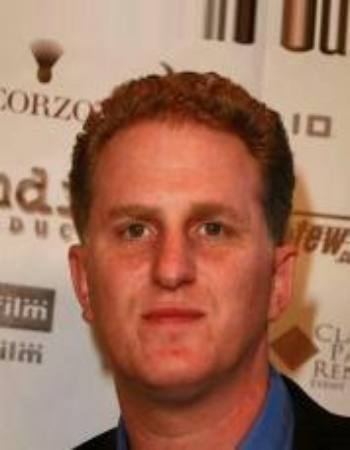

In [9]:
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/gdrive/MyDrive/pytest_img/img_align_celeba_small/202485.jpg')
img_resize = cv2.resize(img, dsize=(350, 450)) # 크기 조절

cv2_imshow(img_resize) # 이미지 그리기
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY) # 정확한 인식을 위해 흑백 이미지로 변환

dets = detector(gray, 1)

if len(dets) == 0: # 얼굴영역의 갯수가 0일 경우
  print('발견된 얼굴이 없습니다!')

print("발견된 얼굴의 수:", len(dets)) # 1

발견된 얼굴의 수: 1


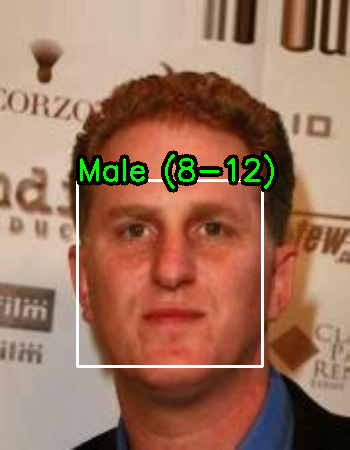

In [12]:
for det in dets: # 모든 얼굴에 대하여
  x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom() # 얼굴 box 좌표
  face_img = img_resize[y1:y2, x1:x2].copy() # 원본 이미지에서 얼굴 영역만 copy

  # 이미지 전처리를 수행하여 blob(Binary Large OBject) 타입으로 변환
  # scale factor: 이미지의 픽셀값 조정을 위한 스케일링 인자. 1은 원본 픽셀값. 0.00392를 사용하면 이미지가 0~255일 때 0~1 범위로 조정됨
  # 신경망 입력을 위해 조정하는 고정된 이미지 크기. (227, 227)
  # mean: 각 색상 채널(BGR)에 대해 빼줄 평균값. 모델 학습 시 사용된 평균값과 일치해야 하므로 고정값 ( 중앙값을 0으로 만듬 )
  # swapRB: 딥러닝 모델이 사용한 것과 같게 BGR 순서를 사용. True는 RGB.

  blob = cv2.dnn.blobFromImage(face_img, scalefactor=1, size=(227, 227), mean=(78.4263377603,87.7689143744, 114.895847746), swapRB=False)

  # 나이 예측
  age_detector.setInput(blob) # 나이 예측 모델의 입력으로 설정
  age_preds = age_detector.forward() # 모델을 실행하여 예측 결과를 얻음
  age = age_list[age_preds[0].argmax()] # 가장 높은 확률을 선택

  # 성별 예측
  gender_detector.setInput(blob)
  gender_preds = gender_detector.forward()
  gender = gender_list[gender_preds[0].argmax()]

  # 계속 for문 안쪽
  cv2.rectangle(img_resize, (x1, y1), (x2, y2), (255, 255, 255), 2) # 마지막 2는 thickness (두께)
  text = f'{gender} {age}' # 텍스트 설정
  cv2.putText(img_resize, text, (x1, y1), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 0),thickness=10) # 글자 배경 (검정)
  cv2.putText(img_resize, text, (x1, y1), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 255, 0),thickness=2) # 글자 (녹색)
  cv2_imshow(img_resize)
  print("\n\n")

# for문 나옴
cv2.waitKey(0)
cv2.destroyAllWindows()